# pororo 설치

In [ ]:
# !pip --version

In [ ]:
# !pip install --upgrade pip

In [ ]:
!git clone https://github.com/kakaobrain/pororo.git

fatal: destination path 'pororo' already exists and is not an empty directory.


In [ ]:
# ls

In [ ]:
# cd pororo

In [ ]:
# !pip install -e .

In [ ]:
# !pip install konlpy

In [ ]:
# from google.colab import drive
# drive.mount('gdrive')

# 필요한 모듈과 파일 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import konlpy

In [ ]:
news20 = pd.read_csv("gdrive/My Drive/data/반려동물_2020.01.01_2020.12.31_1.csv")
news21 = pd.read_csv("gdrive/My Drive/data/반려동물_2021.01.01_2021.12.31_1.csv")
news22 = pd.read_csv("gdrive/My Drive/data/반려동물_2022.01.01_2022.12.25_1.csv")

print(news20.shape, news21.shape,news22.shape)

(4000, 1) (4000, 1) (4000, 1)


In [ ]:
# 컬럼 이름 변경
news20.rename(columns = {'0':'기사 제목'},inplace=True)
news21.rename(columns = {'0':'기사 제목'},inplace=True)
news22.rename(columns = {'0':'기사 제목'},inplace=True)

In [ ]:
news20.head()

,기사 제목
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""


In [ ]:
import re

def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]',' ',text)
    text = re.sub('[\s]+',' ',text)
    text = re.sub("[!\"\$\*\']", ' ', text)
    text = text.lower()
    return text

In [ ]:
from tqdm import tqdm
tqdm.pandas()

news20["기사 제목"] = news20["기사 제목"].progress_map(preprocessing)
news21["기사 제목"] = news21["기사 제목"].progress_map(preprocessing)
news22["기사 제목"] = news22["기사 제목"].progress_map(preprocessing)

100%|██████████| 4000/4000 [00:00<00:00, 89244.31it/s]


In [ ]:
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ["년","에","로","월","일","더","도","제","의","번째","호","만"]
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [ ]:
news20["기사 제목"] = news20["기사 제목"].map(remove_stopwords)
news21["기사 제목"] = news21["기사 제목"].map(remove_stopwords)
news22["기사 제목"] = news22["기사 제목"].map(remove_stopwords)

In [ ]:
from pororo import Pororo

Pororo.available_tasks()

"Available tasks are ['mrc', 'rc', 'qa', 'question_answering', 'machine_reading_comprehension', 'reading_comprehension', 'sentiment', 'sentiment_analysis', 'nli', 'natural_language_inference', 'inference', 'fill', 'fill_in_blank', 'fib', 'para', 'pi', 'cse', 'contextual_subword_embedding', 'similarity', 'sts', 'semantic_textual_similarity', 'sentence_similarity', 'sentvec', 'sentence_embedding', 'sentence_vector', 'se', 'inflection', 'morphological_inflection', 'g2p', 'grapheme_to_phoneme', 'grapheme_to_phoneme_conversion', 'w2v', 'wordvec', 'word2vec', 'word_vector', 'word_embedding', 'tokenize', 'tokenise', 'tokenization', 'tokenisation', 'tok', 'segmentation', 'seg', 'mt', 'machine_translation', 'translation', 'pos', 'tag', 'pos_tagging', 'tagging', 'const', 'constituency', 'constituency_parsing', 'cp', 'pg', 'collocation', 'collocate', 'col', 'word_translation', 'wt', 'summarization', 'summarisation', 'text_summarization', 'text_summarisation', 'summary', 'gec', 'review', 'review_s

In [ ]:
ocr = Pororo(task='ocr')

# 쇼핑 리뷰 데이터셋 훈련 모델

In [ ]:
sa_shop = Pororo(task='sentiment', model='brainbert.base.ko.shopping', lang='ko')

In [ ]:
news22["기사 제목"][290]

' 문재인과 반려동물 달력에 국민의힘 키우던 풍산개는 버리면서 '

In [ ]:
sa_shop(news22["기사 제목"][290])

'Negative'

In [ ]:
# 반복문으로 긍정 부정 분류
# num = 0
# emotion = []

# while True:
#     print(num)
    
#     if num == 4000:
#         break

#     feel = sa_shop(news22["기사 제목"][num])
#     print(feel)
    
#     emotion.append(feel)

#     num = num + 1
# df = pd.DataFrame(emotion)
# df.columns = ["emotion_shop"]
# df.to_csv('sa_shop_emotion_2022.csv',index = False)

In [ ]:
shop_2020 = pd.read_csv("sa_shop_emotion_2020.csv")
shop_2021 = pd.read_csv("sa_shop_emotion_2021.csv")
shop_2022 = pd.read_csv("sa_shop_emotion_2022.csv")
shop_2020.head()

,emotion_shop
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


# 네이터 영화 리뷰 데이터셋에서 훈련 모델

In [ ]:
sa_movie = Pororo(task='sentiment', model='brainbert.base.ko.nsmc', lang='ko')

In [ ]:
news21["기사 제목"][430]

'디지털서울문화예술대학교 교육혁신지원사업단 반려동물학과 산학협력위원회 '

In [ ]:
sa_movie(news21["기사 제목"][430])

'Negative'

In [ ]:
# 반복문으로 긍정 부정 분류

# num = 0
# emotion = []

# while True:
#     print(num)
    
#     if num == 4000:
#         break

#     feel = sa_movie(news20["기사 제목"][num])
#     print(feel)
    
#     emotion.append(feel)

#     num = num + 1
# df = pd.DataFrame(emotion)
# df.columns = ["emotion_movie"]
# df.to_csv('sa_movie_emotion_2020.csv',index = False)

In [ ]:
movie_2020 = pd.read_csv("sa_movie_emotion_2020.csv")
movie_2021 = pd.read_csv("sa_movie_emotion_2021.csv")
movie_2022 = pd.read_csv("sa_movie_emotion_2022.csv")
movie_2020.head()

,emotion_movie
0,Negative
1,Positive
2,Negative
3,Positive
4,Positive


In [ ]:
# 두개의 파일 합쳐주기
news2020 = pd.concat([news20,shop_2020, movie_2020],axis =1)
news2021 = pd.concat([news21,shop_2021, movie_2021],axis =1)
news2022 = pd.concat([news22,shop_2022, movie_2022],axis =1)

In [ ]:
news2020.head(5)

,기사 제목,emotion_shop,emotion_movie
0,은평구 반려동물 문화교실 댕댕이 스쿨 운영,Positive,Negative
1,새해부터 반려동물 미용사 나무의사도 신중년 고용장려금 받는다,Positive,Positive
2,반려식물로 코로나 우울 해소,Positive,Negative
3,우리 아이와 반려동물 함께 생활해도 괜찮을까,Positive,Positive
4,영상 반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝,Positive,Positive


In [ ]:
news2022.tail(10)

,기사 제목,emotion_shop,emotion_movie
3990,인천시 인천 반려동물 문화축제 개최,Negative,Negative
3991,반려동물 장례지도사는 왜 목욕탕에 못 갈까,Negative,Negative
3992,반려동물 한마당 행사 전북대서 개최,Positive,Positive
3993,정부 반려동물 이동식 화장서비스 등 허용,Negative,Negative
3994,신문브리핑 반려동물 화장장 찬반 팽팽 외 주요기사,Negative,Negative
3995,펫푸드협회 반려동물 장수 위한 펫푸드 팁 소개,Positive,Negative
3996,수원시 반려동물 문화교실 참여자 선착순 모집,Positive,Negative
3997,정황근 장관 반려동물산업 스마트팜 등 규제 대못 뽑겠다,Negative,Positive
3998,반려동물 사고 예방 펫티켓 운동 확산돼야,Positive,Positive
3999,반려동물 수술 때 설명 불충분 수의사가 위자료 배상 책임,Negative,Negative


In [ ]:
# 중복값 제거
news2020 = news2020.drop_duplicates()
news2021 = news2021.drop_duplicates()
news2022 = news2022.drop_duplicates()
news2020.shape,news2021.shape,news2022.shape

((2801, 3), (2749, 3), (2787, 3))

# 시각화

쇼핑물 데이터셋이 분석하는 긍정, 부정과 영화리뷰 데이터셋이 분석한 긍정, 부정 비교

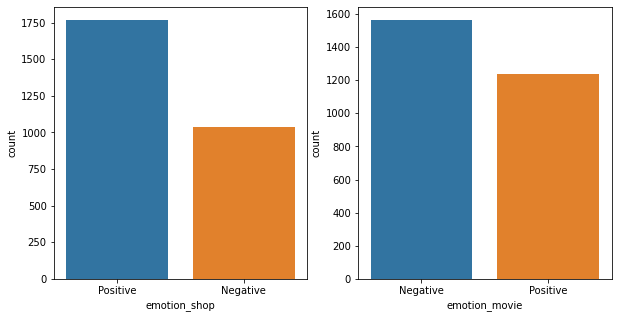

In [ ]:
# 2020년도 비교
fig, ax = plt.subplots(ncols=2,figsize = (10,5))

sns.countplot(data=news2020, x= "emotion_shop", ax=ax[0])
sns.countplot(data=news2020, x= "emotion_movie", ax=ax[1])

ax[0, 0].set_title("Sigmoid function")
ax[1, 1].set_title("Exponential function")

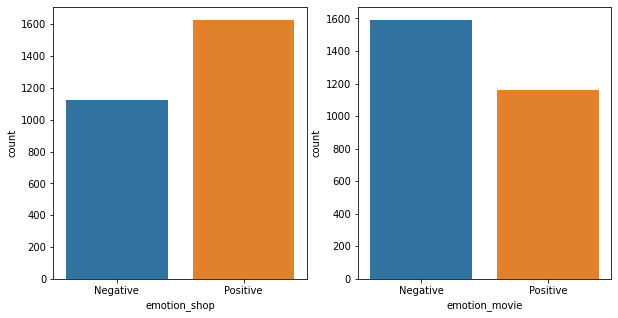

In [ ]:
# 20201년도 비교
fig, ax = plt.subplots(ncols=2,figsize = (10,5))

sns.countplot(data=news2021, x= "emotion_shop", ax=ax[0])
sns.countplot(data=news2021, x= "emotion_movie", ax=ax[1])

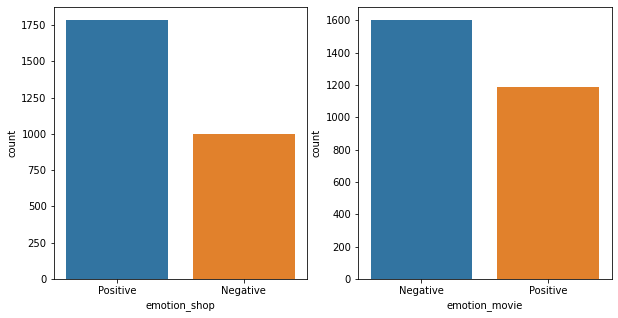

In [ ]:
# 2022년도 비교
fig, ax = plt.subplots(ncols=2,figsize = (10,5))

sns.countplot(data=news2022, x = "emotion_shop", ax=ax[0])
sns.countplot(data=news2022, x = "emotion_movie", ax=ax[1])

# 파생 변수 만들기

쇼핑물 리뷰 데이터 셋 감정 결과 와 영화 리뷰 데이터 셋 감정 결과 

모두 부정이면 부정으로 모두 긍정이면 긍정 , 양쪽 결과가 다르면 중립으로 설정해 파생 변수를 만들었습니다.

In [ ]:
def quadrant(x, y):
    if x == "Negative" and y == "Negative":
        return 'Negative'
    elif x == "Positive" and y == "Positive" :
        return 'Positive'
    else :
        return 'neutrality'

In [ ]:
news2020["emotion_total"] = news2020.apply(lambda x: quadrant(x.emotion_shop, x.emotion_movie), axis = 1)
news2021["emotion_total"] = news2021.apply(lambda x: quadrant(x.emotion_shop, x.emotion_movie), axis = 1)
news2022["emotion_total"] = news2022.apply(lambda x: quadrant(x.emotion_shop, x.emotion_movie), axis = 1)

In [ ]:
news2021.tail()

,기사 제목,emotion_shop,emotion_movie,emotion_total
3995,올치올치 포토 반려동물 인테리어도 럭셔리하게,Positive,Positive,Positive
3996,대한항공 글로벌 항공사 최초 e doc 시스템 도입,Positive,Negative,neutrality
3997,정관장 지니펫 소노펫클럽앤리조트와 반려동물 면역력 증진 프로모션 전개,Positive,Negative,neutrality
3998,포토 현대홈쇼핑 반려동물과 커플 목걸이 맞추세요,Positive,Negative,neutrality
3999,펫펨족 불붙는 롯데 신세계 유통공룡들의 반려동물 시장 경쟁,Negative,Negative,Negative


In [ ]:
news2020["emotion_total"].value_counts()

neutrality    1044
Positive       980
Negative       777
Name: emotion_total, dtype: int64

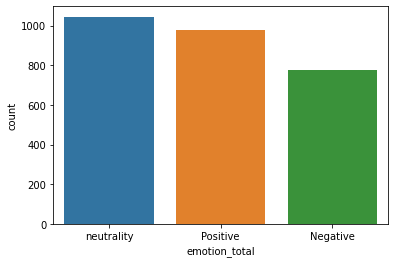

In [ ]:
sns.countplot(data=news2020, x = "emotion_total")

In [ ]:
news2021["emotion_total"].value_counts()

neutrality    1060
Positive       863
Negative       826
Name: emotion_total, dtype: int64

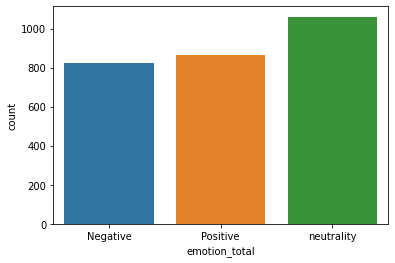

In [ ]:
sns.countplot(data=news2021, x = "emotion_total")

In [ ]:
news2022["emotion_total"].value_counts()

neutrality    1066
Positive       952
Negative       769
Name: emotion_total, dtype: int64

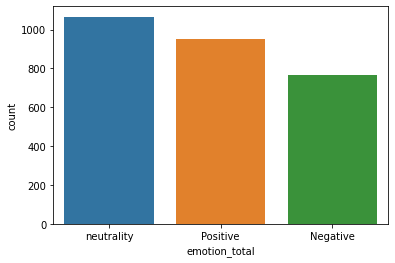

In [ ]:
sns.countplot(data=news2022, x = "emotion_total")